<a href="https://colab.research.google.com/github/SarveswaranAbinash/ML_Tutorial/blob/main/COMP3010_Tutorial05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COMP3010 - Machine Learning**

The tutorial contains two parts: (theoretical) discussion and (practical) coding. The discussion part consists of important concepts, advanced topics, or open-ended questions, for which we want an in-depth discussion. The coding part contains programming exercises for you to gain hands on experience.

## **Tutorial 05**
Learning outcomes:

*   Implement neural networks using Pytorch
*   Implement neural networks using Numpy
*   Apply neural networks for handwritten digits recognition


## **Discussion**


1.   Where does the term "deep learning" come from? What is the difference with "shallow learning"?

2.   How do the different types of layers (input, hidden, output) contribute to a neural network's functionality?

3.   Can you discuss the importance of activation functions in neural networks?

4.   Discuss the expressive power or capacity of neural networks.

5.   What are some of the current challenges faced in deep learning or neural networks?

## **Coding**


In this part, you will implement a simple feedforward neural network, aka Multi-Layer Perceptron (MLP), using Pytorch and Numpy.

## Outline
- [ 1 - Packages ](#1)
- [ 2 - Neural Networks ](#2)
  - [ 2.1 - Problem Statement](#2.1)
  - [ 2.2 - Dataset](#2.2)
    - [ 2.2.1 - View the variables](#2.2.1)
    - [2.2.2 Check the dimensions of your variables](#2.2.2)
    - [2.2.3 Visualising the data](#2.2.3)
  - [ 2.3 - Model representation](#2.3)
  - [ 2.4 - Pytorch Model Implementation](#2.4)
    - [ Exercise01 ](#ex01)
  - [ 2.5 NumPy Model Implementation (Forward Prop in NumPy)](#2.5)
    - [ Exercise02](#ex02)
- [ 3 - NumPy Broadcasting Tutorial (Optional)](#3)


<a name="1"></a>
## 1 - Packages

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [pytorch](https://www.pytorch.org/) is a popular platform for deep learning.



In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

import logging

Some utility functions:

In [2]:
def load_data():
    X = np.load("week5X.npy")
    y = np.load("week5y.npy", allow_pickle=True)
    X = X[0:1000]
    y = y[0:1000]
    return X, y

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

<a name="2"></a>
## 2 - Neural Networks

So far, you  have implemented logistic regression and SVM which can handle linear classification. This was extended to handle non-linear boundaries using kernel trick. For even more complex scenarios such as image recognition, neural networks are preferred.

<a name="2.1"></a>
### 2.1 Problem Statement

In this exercise, you will use a neural network to recognize two handwritten digits, zero and one. This is a binary classification task. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks.

This exercise will show you how the methods you have learned can be used for this classification task.

<a name="2.2"></a>
### 2.2 Dataset

You will start by loading the dataset for this task.
- The `load_data()` function shown below loads the data into variables `X` and `y`


- The data set contains 1000 training examples of handwritten digits $^1$, here limited to zero and one.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit.
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location.
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector.
        - Each training example becomes a single row in our data matrix `X`.
        - This gives us a 1000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X =
\left(\begin{array}{cc}
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\
--- (x^{(n)}) ---
\end{array}\right)$$

- The second part of the training set is a 1000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 1` if the image is of the digit `1`.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

In [3]:
X = np.load('../data/week5X.npy')
y = np.load('../data/week5y.npy')
print(X.shape, y.shape)

FileNotFoundError: [Errno 2] No such file or directory: '../data/week5X.npy'

In [4]:
!curl -LJO https://github.com/qilinli/COMP3010-Machine-Learning/raw/master/week5X.npy
!curl -LJO https://github.com/qilinli/COMP3010-Machine-Learning/raw/master/week5y.npy

# load dataset
X, y = load_data()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 15.2M  100 15.2M    0     0  12.6M      0  0:00:01  0:00:01 --:--:-- 57.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  5128  100  5128    0     0  12789      0 --:--:-- --:--:-- --:--:-- 12789


<a name="2.2.1"></a>
#### 2.2.1 View the variables
Let's get more familiar with your dataset.  
- A good place to start is to print out each variable and see what it contains.

The code below prints elements of the variables `X` and `y`.  

In [5]:
print ('The first element of X is: ', X[0])
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

<a name="2.2.2"></a>
#### 2.2.2 Check the dimensions of your variables

Another way to get familiar with your data is to view its dimensions. Please print the shape of `X` and `y` and see how many training examples you have in your dataset.

In [6]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


<a name="2.2.3"></a>
#### 2.2.3 Visualizing the Data

You will begin by visualizing a subset of the training set.
- In the cell below, the code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together.
- The label for each image is displayed above the image

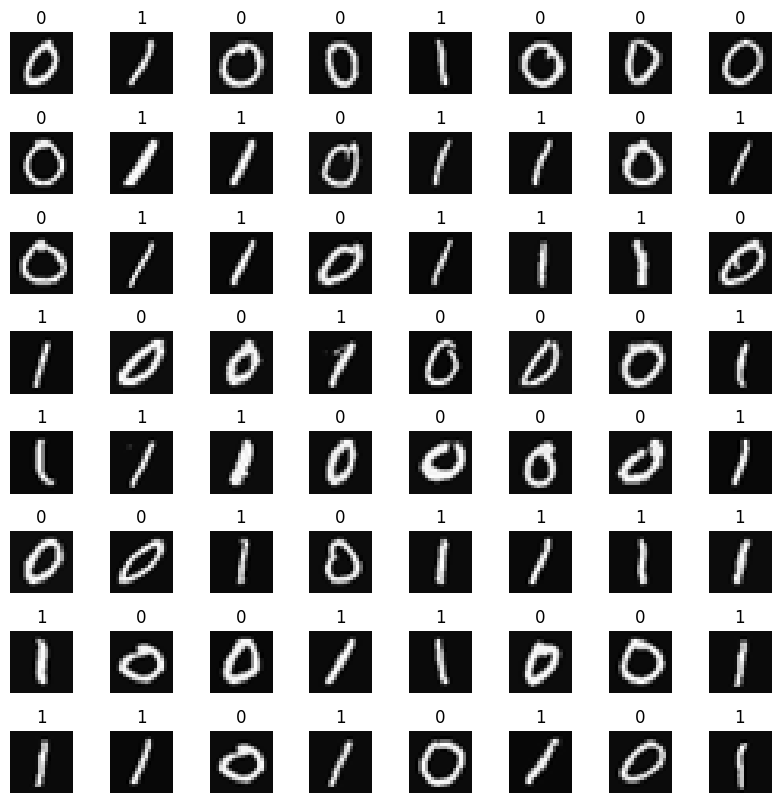

In [7]:
# You do not need to modify anything in this cell
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

n, d = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(n)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

<a name="2.3"></a>
### 2.3 Model representation

The neural network you will use in this assignment is shown in the figure below.
- This has three dense layers with sigmoid activations.
- Recall that our inputs are pixel values of digit images.
- Since the images are of size $20\times20$, this gives us $400$ inputs  
    
<img src="https://github.com/greyhatguy007/Machine-Learning-Specialization-Coursera/blob/main/C2%20-%20Advanced%20Learning%20Algorithms/week1/C2W1A1/images/C2_W1_Assign1.PNG?raw=true" width="500" height="400">

- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $1$ output unit in layer 3.

    - Recall that the dimensions of these parameters are determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 1) and the shape of `b3` is: (1,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (n,1) array.
               

<a name="2.4"></a>
### 2.4 Pytorch Model Implementation

In Pytorch, we normally define neural network modules as a class, inheriting from the base class ``nn.Module``. The class consists of two functions: ``__init__`` and ``forward``. The former is a constructor that initialises the neural network, in particular its layers. The later defines the forward pass, which takes an input tensor ``x`` and returns the output tensor. Note that we don't need to define the backward pass, as it is handled automatically by Pytorch (based on the forward computation).

<a name="ex01"></a>
### Exercise 1

Below, using [Pytorch](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html) with a sigmoid activation to construct the network described above.

In [64]:
class SigmoidNet(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size_1),
            nn.Sigmoid(),
            nn.Linear(hidden_size_1, hidden_size_2),  # Use hidden_size_2 here
            nn.Sigmoid(),
            nn.Linear(hidden_size_2, output_size),
            nn.Sigmoid()
        )

    # Rest of the class remains the same

    input_size = 400  # Assuming 28x28 image data (modify as needed)
hidden_size_1 = 25  # Size for the first hidden layer
hidden_size_2 = 15  # Size for the second hidden layer (modify as needed)
output_size = 1  # Assuming 10 output classes (modify as needed)

torch_nn = SigmoidNet(input_size, hidden_size_1, hidden_size_2, output_size)
print(torch_nn)



SigmoidNet(
  (layers): Sequential(
    (0): Linear(in_features=400, out_features=25, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=25, out_features=15, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=15, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


:::Let's further examine the weights to verify that pytorch produced the same dimensions as we calculated above.


In [65]:
### Check the index of layers in the print(torch_nn)
W1, b1 = torch_nn.layers[0].weight, torch_nn.layers[0].bias
W2, b2 = torch_nn.layers[2].weight, torch_nn.layers[2].bias
W3, b3 = torch_nn.layers[4].weight, torch_nn.layers[4].bias
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = torch.Size([25, 400]), b1 shape = torch.Size([25])
W2 shape = torch.Size([15, 25]), b2 shape = torch.Size([15])
W3 shape = torch.Size([1, 15]), b3 shape = torch.Size([1])


**Expected Output**
```
W1 shape = torch.Size([25, 400]), b1 shape = torch.Size([25])
W2 shape = torch.Size([15, 25]), b2 shape = torch.Size([15])
W3 shape = torch.Size([1, 15]), b3 shape = torch.Size([1])
```
note that pytorch stores weights in the shape __(out_features, in_features)__ and transposes them during the forward pass due to a combination of historical conventions, computational efficiency, and alignment with mathematical notation

The following code will define a loss function and run gradient descent to fit the weights of the model to the training data. This will be explained in more detail in the following week.

In [37]:
## Specify loss and optimization functions

# specify loss function
criterion = nn.BCELoss()

# specify optimizer
# Use Adam with learning rate 0.001 (we will talk about Adam in later lecture)
optimizer = torch.optim.Adam(torch_nn.parameters(), lr=0.001)

---
### Train the Network

The steps for training/learning from a batch of data are described in the comments below:
1. Clear the gradients of all optimized variables
2. Forward pass: compute predicted outputs by passing inputs to the model
3. Calculate the loss
4. Backward pass: compute gradient of the loss with respect to model parameters
5. Perform a single optimization step (parameter update)

The following loop trains for 300 epochs; feel free to change this number. As you train, take a look at how the values for the training loss decrease over time. We want it to decrease while also avoiding overfitting the training data.

In [38]:
# Conver numpy data to torch tensor
X_torch = torch.tensor(X, dtype=torch.float32)
y_torch = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [39]:
# number of epochs to train the model
n_epochs = 300

for epoch in range(n_epochs):
  # clear the gradients of all optimized variables
  optimizer.zero_grad()

  # forward pass: compute predicted outputs by passing inputs to the model
  output = torch_nn(X_torch)

  # calculate the loss
  loss = criterion(output, y_torch)

  # backward pass: compute gradient of the loss with respect to model parameters
  loss.backward()

  # perform a single optimization step (parameter update)
  optimizer.step()

  print(f"Epoch {epoch}/{n_epochs}: loss {loss}")

Epoch 0/300: loss 0.6982640027999878
Epoch 1/300: loss 0.6965610980987549
Epoch 2/300: loss 0.6948979496955872
Epoch 3/300: loss 0.6932765245437622
Epoch 4/300: loss 0.6916961073875427
Epoch 5/300: loss 0.6901522278785706
Epoch 6/300: loss 0.6886358857154846
Epoch 7/300: loss 0.6871345043182373
Epoch 8/300: loss 0.6856369376182556
Epoch 9/300: loss 0.684134304523468
Epoch 10/300: loss 0.6826194524765015
Epoch 11/300: loss 0.6810877919197083
Epoch 12/300: loss 0.6795353889465332
Epoch 13/300: loss 0.6779596209526062
Epoch 14/300: loss 0.6763582229614258
Epoch 15/300: loss 0.674729585647583
Epoch 16/300: loss 0.6730726957321167
Epoch 17/300: loss 0.6713865995407104
Epoch 18/300: loss 0.6696707606315613
Epoch 19/300: loss 0.6679246425628662
Epoch 20/300: loss 0.6661475896835327
Epoch 21/300: loss 0.6643392443656921
Epoch 22/300: loss 0.6624987125396729
Epoch 23/300: loss 0.6606253981590271
Epoch 24/300: loss 0.6587182283401489
Epoch 25/300: loss 0.6567758917808533
Epoch 26/300: loss 0.654

To run the model on an example with a forward pass to make a prediction:

In [40]:
prediction = torch_nn(X_torch[0])  # a zero
print(f" predicting a zero: {prediction}")
prediction = torch_nn(X_torch[500])  # a one
print(f" predicting a one:  {prediction}")

 predicting a zero: tensor([0.0718], grad_fn=<SigmoidBackward0>)
 predicting a one:  tensor([0.9326], grad_fn=<SigmoidBackward0>)


The output of the model is interpreted as a probability. In the first example above, the input is a zero. The model predicts the probability that the input is a one is nearly zero.
In the second example, the input is a one. The model predicts the probability that the input is a one is nearly one.
As in the case of logistic regression, the probability is compared to a threshold to make a final prediction.

In [41]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


Let's compare the predictions vs the labels for a random sample of 64 digits. This takes a moment to run.


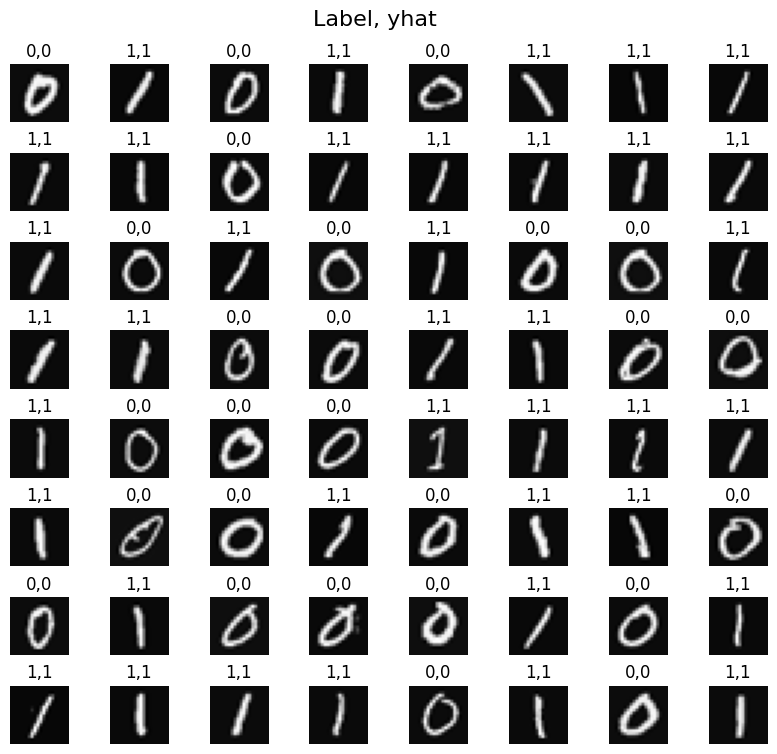

In [42]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

n, d = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(n)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_torch[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = torch_nn(X_torch[random_index])
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0

    # Display the label above the image
    ax.set_title(f"{int(y[random_index,0])},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

<a name="2.5"></a>
### 2.5 NumPy Model Implementation (Forward Prop in NumPy)
It is possible to build your own dense layer using NumPy. This can then be utilized to build a multi-layer neural network. The full operation is $\mathbf{Z}=\mathbf{XW^T}+\mathbf{b}$. This will utilize NumPy broadcasting to expand $\mathbf{b}$ to $n$ rows. If this is unfamiliar, a short tutorial is provided at the end of the notebook.


<a name="ex02"></a>
### Exercise 2

Below, compose a new `my_dense` subroutine that performs the layer calculations for a matrix of examples. This will utilize `np.matmul()`.

In [44]:

def my_dense(X_in, W, b, g):
  """
  Computes dense layer operations for a matrix of examples.

  Args:
      X_in (ndarray (n, d)): Data, n examples with d features each.
      W (ndarray (d_out, d_in)): Weight matrix, d_out output units and d_in input features.
      b (ndarray (1, d_out)): Bias vector, 1 row with d_out units.
      g (function): Activation function to apply (e.g., sigmoid, relu).

  Returns:
      ndarray (n, d_out): Output of the dense layer, n examples with d_out units.
  """

  # Perform the linear transformation (forward propagation)
  Z = np.matmul(X_in, W.T) + b  # Use W.T for efficient matrix multiplication

  # Apply the activation function
  X_out = g(Z)

  return X_out


let's do a simple test:

In [45]:
X_tst = 0.1*np.arange(1,9,1).reshape(4,2) # (4 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(3,2) # (3 output features, 2 input features)
b_tst = 0.1*np.arange(1,4,1).reshape(1,3) # (1, 3 features)
A_tst = my_dense(X_tst, W_tst, b_tst, sigmoid)
print(A_tst.shape)

(4, 3)


**Expected Output**
```
(4,3)
```

The following cell builds a three-layer neural network utilizing the `my_dense` subroutine above.

In [46]:
def numpy_nn(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x,  W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    return a3

We can copy trained weights and biases from Pytorch. (otherwise we need to write cubersome code for backpropagation)

In [66]:
W1, b1 = torch_nn.layers[0].weight, torch_nn.layers[0].bias
W2, b2 = torch_nn.layers[2].weight, torch_nn.layers[2].bias
W3, b3 = torch_nn.layers[4].weight, torch_nn.layers[4].bias
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

# Convert pytorch tensors to numpy array
W1, b1 = W1.detach().numpy(), b1.detach().numpy()
W2, b2 = W2.detach().numpy(), b2.detach().numpy()
W3, b3 = W3.detach().numpy(), b3.detach().numpy()

W1 shape = torch.Size([25, 400]), b1 shape = torch.Size([25])
W2 shape = torch.Size([15, 25]), b2 shape = torch.Size([15])
W3 shape = torch.Size([1, 15]), b3 shape = torch.Size([1])


In [48]:
# make predictions
prediction = numpy_nn(X[0], W1, b1, W2, b2, W3, b3)
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[0,0])

prediction = numpy_nn(X[500], W1, b1, W2, b2, W3, b3)
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[500,0])

yhat =  0  label=  0
yhat =  1  label=  1


Run the following cell to see predictions from both the Numpy model and the Pytorch model. This takes a moment to run.

<ipython-input-49-bd09c3010647>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  np_yhat = int(np_prediction >= 0.5)


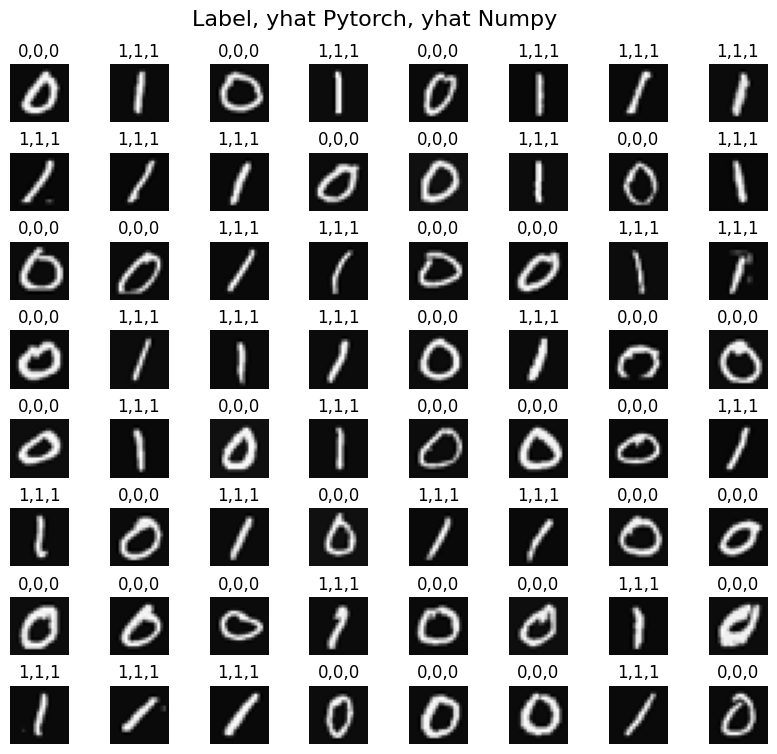

In [49]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network implemented in Numpy
    np_prediction = numpy_nn(X[random_index], W1, b1, W2, b2, W3, b3)
    np_yhat = int(np_prediction >= 0.5)

    # Predict using the Neural Network implemented in Tensorflow
    pt_prediction = torch_nn(X_torch[random_index])
    pt_yhat = int(pt_prediction >= 0.5)

    # Display the label above the image
    ax.set_title(f"{int(y[random_index,0])},{pt_yhat},{np_yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat Pytorch, yhat Numpy", fontsize=16)
plt.show()

You can see how one of the misclassified images looks.

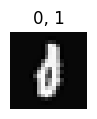

In [50]:
fig = plt.figure(figsize=(1, 1))
np_prediction = numpy_nn(X, W1, b1, W2, b2, W3, b3)
np_yhat = (np_prediction > 0.5).astype(int)
errors = np.where(y != np_yhat)
random_index = errors[0][0]
X_random_reshaped = X[random_index].reshape((20, 20)).T
plt.imshow(X_random_reshaped, cmap='gray')
plt.title(f"{y[random_index, 0]}, {np_yhat[random_index, 0]}")
plt.axis('off')
plt.show()

Congratulations!
You have successfully built and utilized a neural network.

<a name="3"></a>
## 3 -  NumPy Broadcasting Tutorial (Optional)


In the last example,  $\mathbf{Z}=\mathbf{XW} + \mathbf{b}$ utilized NumPy broadcasting to expand the vector $\mathbf{b}$. If you are not familiar with NumPy Broadcasting, this short tutorial is provided.

$\mathbf{XW}$  is a matrix-matrix operation with dimensions $(m,j_1)(j_1,j_2)$ which results in a matrix with dimension  $(m,j_2)$. To that, we add a vector $\mathbf{b}$ with dimension $(1,j_2)$.  $\mathbf{b}$ must be expanded to be a $(m,j_2)$ matrix for this element-wise operation to make sense. This expansion is accomplished for you by NumPy broadcasting.

Broadcasting applies to element-wise operations.  
Its basic operation is to 'stretch' a smaller dimension by replicating elements to match a larger dimension.

More [specifically](https://NumPy.org/doc/stable/user/basics.broadcasting.html):
When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when
- they are equal, or
- one of them is 1   

If these conditions are not met, a ValueError: operands could not be broadcast together exception is thrown, indicating that the arrays have incompatible shapes. The size of the resulting array is the size that is not 1 along each axis of the inputs.


For each of the following examples, try to guess the size of the result before running the example.

In [51]:
a = np.array([1,2,3]).reshape(-1,1)  #(3,1)
b = 5
print(f"(a + b).shape: {(a + b).shape}, \na + b = \n{a + b}")

(a + b).shape: (3, 1), 
a + b = 
[[6]
 [7]
 [8]]


Note that this applies to all element-wise operations:

In [52]:
a = np.array([1,2,3]).reshape(-1,1)  #(3,1)
b = 5
print(f"(a * b).shape: {(a * b).shape}, \na * b = \n{a * b}")

(a * b).shape: (3, 1), 
a * b = 
[[ 5]
 [10]
 [15]]


In [53]:
a = np.array([1,2,3,4]).reshape(-1,1)
b = np.array([1,2,3]).reshape(1,-1)
print(a)
print(b)
print(f"(a + b).shape: {(a + b).shape}, \na + b = \n{a + b}")

[[1]
 [2]
 [3]
 [4]]
[[1 2 3]]
(a + b).shape: (4, 3), 
a + b = 
[[2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]]
